In [0]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_union

In [0]:
url = 'https://raw.githubusercontent.com/micklwl/cs3244/master/dataset.csv'
train = pd.read_csv(url, sep=',')

train['id'] = np.arange(len(train))
train.head(100)

,Insult,Comment,id
0,1,you fuck your dad,0
1,0,i really do not understand your point it seem...,1
2,0,a majority of canadians can and has been wron...,2
3,0,listen if you dont wanna get married to a man ...,3
4,0,các bạn xuống đường biểu tình 2011 có ôn hoà k...,4
...,...,...,...
95,1,correction bitch you do not think its superb b...,95
96,1,i think the only trickle that effected you was...,96
97,1,and you keep on your knees and keep telling yo...,97
98,0,what was that like 2000 words about nothing yo...,98


In [0]:
from sklearn.model_selection import train_test_split

# Split the data
train, test = train_test_split(train, test_size=0.2, shuffle= True)

In [0]:
train_text = train['Comment']
test_text = test['Comment']
#all_text = pd.concat([train_text, test_text])

In [0]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    stop_words = 'english',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    max_features=30000)

RUN this for cross_val_score

In [0]:
word_vectorizer.fit(train_text)
train_features = word_vectorizer.transform(train_text)
test_features = word_vectorizer.transform(test_text)

classifier = LogisticRegression(C = 0.1,solver='sag')
train_target = train["Insult"]
submission = pd.DataFrame.from_dict({'id': test['id']})
scores = []
cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='roc_auc'))

scores.append(cv_score)
print('CV score for class {} is {}'.format("Insult", cv_score))

classifier.fit(train_features, train_target)
submission["Insult"] = classifier.predict_proba(test_features)[:, 1]

CV score for class Insult is 0.9492760908148311


In [0]:
submission

,id,Insult
119020,119020,0.081390
15812,15812,0.075280
106048,106048,0.062678
39612,39612,0.246615
117060,117060,0.034207
...,...,...
168109,168109,0.386991
48016,48016,0.761503
52091,52091,0.541738
121883,121883,0.044134


In [0]:
classifier.fit(train_features, train_target)
predicted = classifier.predict(test_features)
predicted

array([0, 0, 0, ..., 1, 0, 0])

In [0]:
test_values = test["Insult"].values
test_values

array([0, 0, 0, ..., 1, 0, 0])

In [0]:
from sklearn import metrics
print("Test accuracy: ", metrics.accuracy_score(test_values, predicted))

Test accuracy:  0.9185777091254753


RUN this for accuracy_score

In [0]:
word_vectorizer.fit(train_text)
train_features = word_vectorizer.transform(train_text)
test_features = word_vectorizer.transform(test_text)

classifier = LogisticRegression(C = 0.1,solver='sag')
train_target = train["Insult"]

classifier.fit(train_features, train_target)
predicted = classifier.predict(test_features)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
test_values = test["Insult"].values
test_values

array([0, 1, 0, ..., 0, 1, 0])

[[29756   128]
 [ 2445  1335]]
Test accuracy:  0.9235682034220533
Test precision:  0.9125085440874915
Test recall:  0.3531746031746032


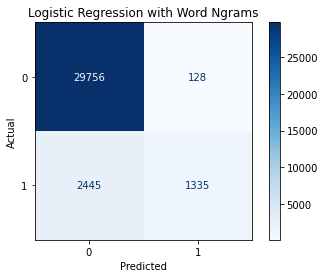

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, test_features,test_values,cmap=plt.cm.Blues,values_format = 'd') #test_values is true values, test_features is the input to be given to be tested, classifier is model name
disp.ax_.set_title("Logistic Regression with Word Ngrams")
disp.ax_.set_xlabel("Predicted")
disp.ax_.set_ylabel("Actual")


print(disp.confusion_matrix)
print("Test accuracy: ", metrics.accuracy_score(test_values, predicted))
print("Test precision: ", metrics.precision_score(test_values, predicted))
print("Test recall: ", metrics.recall_score(test_values, predicted))